In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import FinanceDataReader as fdr

<Axes: xlabel='Date'>

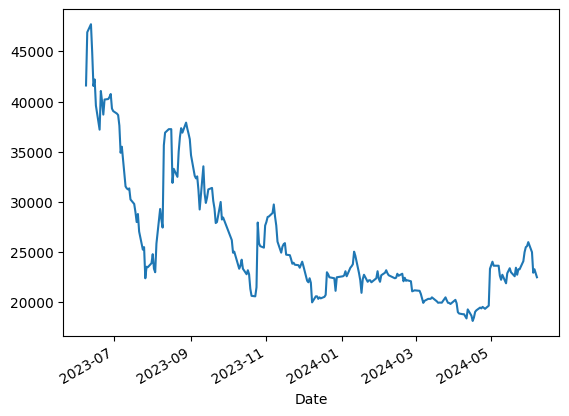

In [15]:
df = fdr.DataReader('439090', '2020')
df['Close'].plot()

/var/folders/sd/2v2zt8g53wx1z01xd3qwhj000000gn/T/ipykernel_35279/2102871804.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avgGain'][df['avgGain'] < 0] = 0
/var/folders/sd/2v2zt8g53wx1z01xd3qwhj000000gn/T/ipykernel_35279/2102871804.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avgLoss'][df['avgLoss'] > 0] = 0


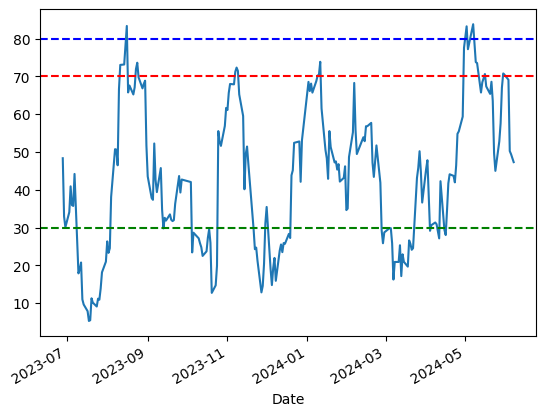

In [16]:
df['avgGain'] = df['Close'].diff()
df['avgLoss'] = df['Close'].diff()
df['avgGain'][df['avgGain'] < 0] = 0
df['avgLoss'][df['avgLoss'] > 0] = 0
df['avgGain'] = df['avgGain'].rolling(window=14).mean()
df['avgLoss'] = df['avgLoss'].rolling(window=14).mean()
df['RS'] = df['avgGain'].abs() / df['avgLoss'].abs()
df['RSI'] = 100 - (100 / (1 + df['RS']))
df['RSI'].plot()
plt.axhline(80, color='b', linestyle='--')
plt.axhline(70, color='r', linestyle='--')
plt.axhline(30, color='g', linestyle='--')

/var/folders/sd/2v2zt8g53wx1z01xd3qwhj000000gn/T/ipykernel_35279/1377576014.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avgGain'][df['avgGain'] < 0] = 0
/var/folders/sd/2v2zt8g53wx1z01xd3qwhj000000gn/T/ipykernel_35279/1377576014.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avgLoss'][df['avgLoss'] > 0] = 0


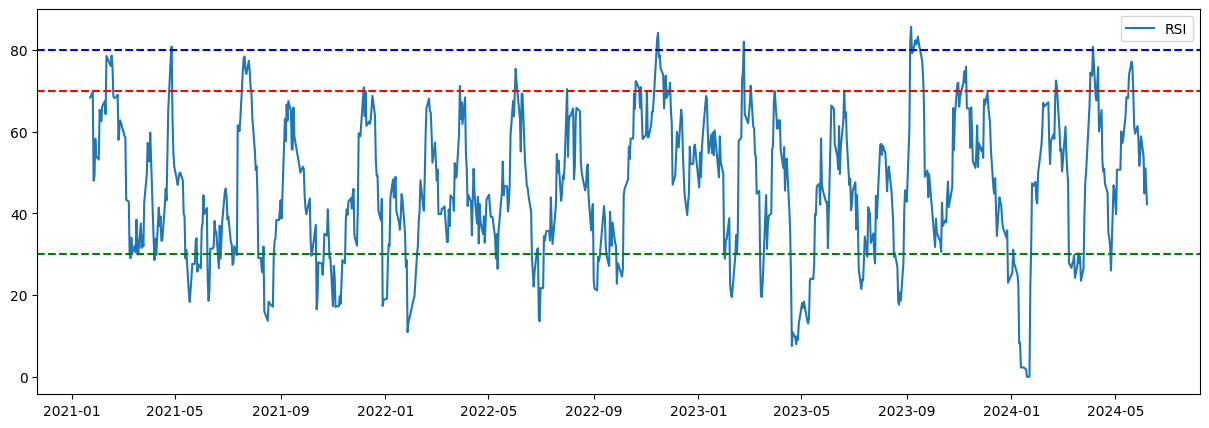

In [26]:
def rsi_fn(df, rsi_period=14):
    df = df.copy()
    df['avgGain'] = df['Close'].diff()
    df['avgLoss'] = df['Close'].diff()
    df['avgGain'][df['avgGain'] < 0] = 0
    df['avgLoss'][df['avgLoss'] > 0] = 0
    df['avgGain'] = df['avgGain'].rolling(window=rsi_period).mean() # EWM -> 지수이동평균 / rolling -> 이동평균 | 차이: 지수이동평균은 최근값에 가중치를 더 둠
    df['avgLoss'] = df['avgLoss'].rolling(window=rsi_period).mean()
    df['RS'] = df['avgGain'].abs() / df['avgLoss'].abs()
    df['RSI'] = 100 - (100 / (1 + df['RS']))
    
    def print_rsi():
        plt.figure(figsize=(15, 5))
        plt.plot(df.index, df['RSI'], label='RSI')
        plt.axhline(80, color='b', linestyle='--')
        plt.axhline(70, color='r', linestyle='--')
        plt.axhline(30, color='g', linestyle='--')
        plt.legend()
        plt.show()
        
    print_rsi()
    return df

df = fdr.DataReader('006650', '2021') # 대한유화
df = rsi_fn(df)